# **Unique Minds Software Workshop 2024** - Σάββατο 20 Απριλίου 2024

**Coordinators**

| Όνομα                              | Εmail                   |
| ----------------------------------- | ---------------------- |
| Ανδρεάς Χρυσοβαλάντης-Κωνσταντίνος | *valantis2000@hotmail.com* |
| Μανιάτης Ανδρέας | *maniatis.andreas@gmail.com* |
| Παπανικολάου Ιωάννης              | *johnpapani1@gmail.com* |


<img src="https://github.com/AndrewManiatis/Unique-Minds-SW-Workshop-2024/blob/main/pexels-brett-sayles.jpg?raw=true" alt="Image Alt Text">

## Διαχείριση δεδομένων με Pandas

Σε αυτό την υποενότητα θα δούμε:
- Διάβασμα Αρχείου
- Βασικές Εντολές
- Πρόσβαση σε γραμμές
- Πρόσβαση σε στήλες



In [ ]:
!pip install seaborn

In [1]:
#Φόρτωση των κατάλληλων βιβλιοθηκών που περιέχουν διάφορες έτοιμες συναρτήσεις που θα χρησιμοποιήσουμε
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from io import BytesIO
from PIL import Image

In [2]:
# Φορτώνουμε το csv αρχείο με τα δεδομένα μας
!wget -O ryanair_reviews.csv https://raw.githubusercontent.com/AndrewManiatis/Unique-Minds-SW-Workshop-2024/main/ryanair_reviews.csv

--2024-04-02 08:32:03--  https://raw.githubusercontent.com/AndrewManiatis/Unique-Minds-SW-Workshop-2024/main/ryanair_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1908140 (1.8M) [text/plain]
Saving to: ‘ryanair_reviews.csv’

ryanair_reviews.csv 100%[===================>]   1.82M  --.-KB/s    in 0.08s   

2024-04-02 08:32:04 (22.4 MB/s) - ‘ryanair_reviews.csv’ saved [1908140/1908140]



In [42]:
# Load the CSV file into a DataFrame (αντικείμενο της βιβλιοθήκης Pandas)
file_path = "ryanair_reviews.csv"

df = pd.read_csv(file_path,index_col=0,parse_dates=True)

In [43]:
#Η μέθοδος head επιστρέφει τις x πρώτες γραμμές
df.head(3)

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN


In [5]:
# Μπορούμε επίσης να λάβουμε μερικά στατιστικά στοιχεία για τα περιεχόμενα κάθε στήλης με τη μέθοδο describe!
df.describe()

,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,2119.000000,2137.000000,2128.000000,1312.000000,1578.000000,2248.000000,331.000000,268.000000
mean,4.380368,2.373421,2.747180,1.921494,2.156527,2.731762,1.157100,1.123134
std,3.554740,1.290634,1.535351,1.492650,1.491115,1.692578,0.566303,0.536798
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,8.000000,3.000000,4.000000,3.000000,3.000000,5.000000,1.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
#df.info()

In [44]:
# Μετατρέπουμε τις στήλες με ημερομηνίες σε αντικείμενα ημερομηνιών.
df['Date Published'] = pd.to_datetime(df['Date Published'])
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

### Πρόσβαση σε γραμμές (rows)

In [8]:
#Χρησιμοποιώντας το label της γραμμής με το χαρακτηριστικό loc
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
#Προσοχή! Η αρίθμηση αρχίζει από το 0
df.loc[0]

Date Published                                          2024-02-03 00:00:00
Overall Rating                                                         10.0
Passenger Country                                            United Kingdom
Trip_verified                                                  Not Verified
Comment title                             "bang on time and smooth flights"
Comment                   Flew back from Faro to London Luton Friday 2nd...
Aircraft                                                     Boeing 737 900
Type Of Traveller                                            Family Leisure
Seat Type                                                     Economy Class
Origin                                                                 Faro
Destination                                                           Luton
Date Flown                                              2024-02-01 00:00:00
Seat Comfort                                                            4.0
Cabin Staff 

In [9]:
#Χρησιμοποιώντας τον αριθμό της γραμμής (βλέπε index) με το χαρακτηριστικό iloc
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc
df.iloc[0]

Date Published                                          2024-02-03 00:00:00
Overall Rating                                                         10.0
Passenger Country                                            United Kingdom
Trip_verified                                                  Not Verified
Comment title                             "bang on time and smooth flights"
Comment                   Flew back from Faro to London Luton Friday 2nd...
Aircraft                                                     Boeing 737 900
Type Of Traveller                                            Family Leisure
Seat Type                                                     Economy Class
Origin                                                                 Faro
Destination                                                           Luton
Date Flown                                              2024-02-01 00:00:00
Seat Comfort                                                            4.0
Cabin Staff 

Στην προκειμένη περίπτωση έχουμε το ίδιο ακριβώς αποτέλεσμα. <br/> **Αν αντίθετα είχαμε κατηγορικές τιμές (λέξεις) στο index μας θα έπρεπε να χειριστούμε το πρόβλημα διαφορετικά:**


In [10]:
df2 = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                   index=['cobra', 'viper', 'sidewinder'],
                   columns=['max_speed', 'shield'])
df2

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


Προσπαθήστε να μαντέψετε ποιο θα είναι το αποτέλεσμα σε κάθε μία από τις παρακάτω περιπτώσεις και έπειτα δοκιμάστε να τρέξετε κάθε μία αφαιρώντας το "#" (uncomment).

In [11]:
# df2.iloc[0]

In [12]:
# df2.loc['cobra']

Για ταυτόχρονη πρόσβαση σε **περισσότερες από μία γραμμές** μπορούμε να χρησιμοποιήσουμε τις παρακάτω εντολές:

In [13]:
#slice
df.iloc[2:5]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


Προσέξτε ότι στην παραπάνω περίπτωση δεν περιλάμβανεται η γραμμή με index = 5

In [14]:
#Χρήση λίστας με integers
list_of_rows = [2,4,6]
df.iloc[list_of_rows]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN
6,2024-01-03,5.0,United Kingdom,Not Verified,"""they are really not better value""",The flight itself is operated by Malta air and...,Boeing 737,Business,Economy Class,Stansted,Pisa,2023-12-01,2.0,5.0,2.0,1.0,1.0,yes,NaN,NaN


### Πρόσβαση σε στήλες (columns)

In [15]:
df["Comment title"]

0              "bang on time and smooth flights"
1               "Another good affordable flight"
2                            “Really impressed!”
3               “a decent offering from Ryanair”
4       “cabin crew were welcoming and friendly”
                          ...                   
2244                     Ryanair customer review
2245                     Ryanair customer review
2246                     Ryanair customer review
2247                     Ryanair customer review
2248                     Ryanair customer review
Name: Comment title, Length: 2249, dtype: object

Πρόσβαση στη στήλη συγκεκριμένης γραμμής:

In [16]:
df.iloc[3]["Comment title"]

'“a decent offering from Ryanair”'

Πρόσβαση σε **περισσότερες από μία στήλες**:

In [17]:
#Με slice
df.iloc[:,0:3]
#πρώτο όρισμα (πριν το κόμμα) γραμμές, δεύτερο όρισμα (μετά το κόμμα) στήλες
#προσέξτε πώς όταν δεν ορίζουμε τα όρια του slice παίρνουμε πίσω όλες τις γραμμές (:)

,Date Published,Overall Rating,Passenger Country
0,2024-02-03,10.0,United Kingdom
1,2024-01-26,10.0,United Kingdom
2,2024-01-20,10.0,United Kingdom
3,2024-01-07,6.0,United Kingdom
4,2024-01-06,10.0,Israel
...,...,...,...
2244,2012-08-28,2.0,United Kingdom
2245,2012-08-28,1.0,United Kingdom
2246,2012-08-28,1.0,United Kingdom
2247,2012-08-28,1.0,Australia


In [18]:
#Με λίστα
#...κάπως διαφορετικά
list_of_columns = ["Overall Rating", "Passenger Country", "Seat Type"]
df.iloc[1:3][list_of_columns]

,Overall Rating,Passenger Country,Seat Type
1,10.0,United Kingdom,Economy Class
2,10.0,United Kingdom,Economy Class


**Σημαντικό!** Μπορούμε επίσης να χρησιμοποιούμε **λογικές εκφράσεις** για να βρούμε τις κατάλληλες πληροφορίες.

Ας βρούμε όλες τις καταχωρήσεις όπου το "Overall Rating" ήταν πάνω από 5:

In [19]:
df[df["Overall Rating"] > 5]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,2024-02-01,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,2024-01-01,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2012-09-03,8.0,Spain,NaN,Ryanair customer review,Ryanair is good for its destinations the small...,NaN,NaN,Economy Class,NaN,NaN,NaT,2.0,3.0,3.0,NaN,3.0,yes,NaN,NaN
2237,2012-09-03,7.0,United Kingdom,NaN,Ryanair customer review,I have flown with Ryanair many times and have ...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,yes,NaN,NaN
2239,2012-09-03,6.0,United Kingdom,NaN,Ryanair customer review,My first Ryanair flight was Manchester to Memm...,NaN,NaN,Economy Class,NaN,NaN,NaT,3.0,2.0,0.0,NaN,3.0,no,NaN,NaN
2240,2012-09-03,9.0,United Kingdom,NaN,Ryanair customer review,Ryanair informed me that my flights from Liver...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,no,NaN,NaN


Για πιο σύνθετα ζητούμενα με **πολλά conditions**, κλείνουμε το κάθε condition σε παρένθεση και χρησιμοποιούμε τα σύμβολα:
- & : και
- | : ή
- ~ : όχι

In [20]:
df[(df["Overall Rating"] > 5) & (df["Passenger Country"] == "United Kingdom")]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,2024-02-01,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,2024-01-01,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
15,2023-11-07,9.0,United Kingdom,Not Verified,"""offers fares at great value""",Couldn’t find any reason to complain. Outbound...,Boeing 737 800,Solo Leisure,Economy Class,Bristol,Dublin,2023-11-01,4.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2012-09-03,8.0,United Kingdom,NaN,Ryanair customer review,July 2012 Bristol to Tenerife. We are a family...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,3.0,3.0,NaN,4.0,yes,NaN,NaN
2237,2012-09-03,7.0,United Kingdom,NaN,Ryanair customer review,I have flown with Ryanair many times and have ...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,yes,NaN,NaN
2239,2012-09-03,6.0,United Kingdom,NaN,Ryanair customer review,My first Ryanair flight was Manchester to Memm...,NaN,NaN,Economy Class,NaN,NaN,NaT,3.0,2.0,0.0,NaN,3.0,no,NaN,NaN
2240,2012-09-03,9.0,United Kingdom,NaN,Ryanair customer review,Ryanair informed me that my flights from Liver...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,no,NaN,NaN


In [21]:
#Βρίσκουμε όλες τις δυνατές τιμές μιας κατηγορίας (στήλης)
#π.χ.
df['Origin'].unique()
#Τι προβλήματα παρατηρείτε στα δεδομένα;
#hint Ctrl+F ->type London

array(['Faro', 'Belfast', 'Edinburgh', 'Dublin', 'Copenhagen', 'Stansted',
       'Beauvais', 'Edinbrough', 'Cologne', 'Krakow', 'Porto', 'Lisbon',
       'Cologne Bonn', 'Alicante', 'Bristol', 'Leeds', 'Venice',
       'Valencia', 'Frankfurt Hanh', 'Oslo', 'Tel Aviv', 'Bergamo',
       'Birmingham', 'Vienna', 'London', 'Charleroi', 'East Midlands',
       'Brussel', 'Brussels Charleroi', 'Madrid', 'Beziers, France',
       'Hahn', 'Knock', 'Malaga', 'Burgas', 'Barcelona', 'Athens',
       'Rabat', 'Bremen', 'Rome Fiumicino', 'Rome', 'London Stansted',
       'Marrakech', 'Sofia', 'Shannon', 'Corfu', 'Berlin', 'Santorini',
       'Brussels', 'Bari', 'Katowice', 'Newcastle', 'Ciampino Rome',
       'Bologna', 'Riga', 'Tangiers', 'Glasgow', 'Ibiza', 'Marseille',
       'Dortmund', 'Frankfurt', 'Milan', 'Madeira', 'Zagreb',
       'Landvetter', 'Gothenburg', 'Bodrum', 'Seville', 'Tallinn',
       'Biarritz', 'Cardiff', 'Eindhoven', 'Helsinki', 'Nis',
       'Leeds Bradford', 'Fuerteventur

Αναδεικνύεται η ανάγκη λοιπόν **καθαρισμού των δεδομένων (data cleaning)**, ένα απαραίτητο βήμα κάθε έργου που φιλοδοξεί να αναλύσει και να εξάγει συμπεράσματα από τα δεδομένα.


> Ο **καθαρισμός δεδομένων** είναι η διαδικασία διόρθωσης ή αφαίρεσης εσφαλμένων, αλλοιωμένων, εσφαλμένα μορφοποιημένων, διπλών ή ελλιπών δεδομένων σε ένα σύνολο δεδομένων. Όταν συνδυάζονται πολλαπλές πηγές δεδομένων, υπάρχουν πολλές ευκαιρίες για δεδομένα που είναι διπλά ή εσφαλμένως επισημασμένα. Εάν τα δεδομένα είναι εσφαλμένα, τα αποτελέσματα και οι αλγόριθμοι είναι αναξιόπιστα, ακόμη και αν φαίνονται σωστά. Δεν υπάρχει ένας απόλυτος τρόπος για να προδιαγράψει κανείς τα ακριβή βήματα στη διαδικασία καθαρισμού δεδομένων, επειδή οι διαδικασίες διαφέρουν από σύνολο δεδομένων σε σύνολο δεδομένων.

Πηγή:https://www.tableau.com/learn/articles/what-is-data-cleaning#definition






---

*Ερωτήσεις*


---



## Προεπεξεργασία και εξερεύνηση δεδομένων

### Ελλιπείς τιμές

Απαραίτητη διαδικασία σε κάθε dataset.<br/>

- Ελέγχουμε για ελλιπείς τιμές *(μηδενικά/ NaN)*
- Καθαρίζουμε τα δεδομένα αποβάλλοντας γραμμές με ελλιπείς τιμές.

In [45]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date Published               0
Overall Rating             130
Passenger Country            0
Trip_verified              944
Comment title                0
Comment                      0
Aircraft                  1698
Type Of Traveller          614
Seat Type                    0
Origin                     615
Destination                615
Date Flown                 618
Seat Comfort               112
Cabin Staff Service        121
Food & Beverages           937
Ground Service             671
Value For Money              1
Recommended                  0
Inflight Entertainment    1918
Wifi & Connectivity       1981
dtype: int64


In [46]:
# Αφαιρούμε στήλες που δεν θα χρησιμοποιήσουμε στην ταξινόμηση

df_cleaned = df.drop(columns=['Trip_verified', 'Date Published', 'Date Flown','Comment', 'Comment title',
                              'Aircraft', 'Type Of Traveller',
                              'Inflight Entertainment', 'Wifi & Connectivity',
                              'Origin', 'Destination']
                     )

In [47]:
# Αντικαθιστούμε τις απουσιάζουσες τιμές με την πιο συχνή τιμή της εκάστοτε στήλης
# Συνήθης πρακτική για την διαχείρηση NaN values

for column in ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money']:
  mode_value = df_cleaned[column].mode()[0]
  df_cleaned[column].fillna(mode_value, inplace=True)

### Κατηγορικά δεδομένα

Οι αλγόριθμοι πρόβλεψης χρησιμοποιούν στατιστικά μοντέλα για την πρόβλεψη τιμών. Ως εκ τούτου δεδομένα τα οποία δεν αποτελούνται από αριθμητικές τιμές και ονομάζονται κατηγορικά, αλλά ακόμα μπορούν να μας χρησιμεύσουν στην πρόβλεψη χρειάζονται μια διαφορετική προσέγγιση. Παρακάτω, βλέπουμε τις δύο στήλες που αποτελούνται από κατηγορικά δεδομένα και τις διαφορετικές τιμές που μπορούν να λάβουν.

In [49]:
print(df_cleaned['Seat Type'].unique(),"\n")
print(df_cleaned['Passenger Country'].unique())

['Economy Class' 'Premium Economy' 'Business Class' 'First Class'] 

['United Kingdom' 'Israel' 'Denmark' 'Australia' 'Germany' 'Albania'
 'Singapore' 'Portugal' 'Canada' 'Spain' 'Belarus' 'Norway'
 'United States' 'Sweden' 'Belgium' 'Iraq' 'United Arab Emirates'
 'Czech Republic' 'Greece' 'Morocco' 'Ireland' 'Netherlands' 'Gibraltar'
 'India' 'Slovenia' 'South Africa' 'Switzerland' 'New Zealand' 'Austria'
 'France' 'Italy' 'Slovakia' 'Croatia' 'Hungary' 'Lithuania' 'Poland'
 'Finland' 'Latvia' 'Ukraine' 'Luxembourg' 'Indonesia' 'Romania' 'Malta'
 'Estonia' 'Cyprus' 'Macedonia' 'Bulgaria' 'Mexico' 'Vietnam' 'Lebanon'
 'Serbia' 'Turkey' 'Malaysia' 'Jordan' 'Philippines' 'Japan' 'Egypt'
 'Russian Federation' 'Chile' 'Hong Kong' 'Iceland' 'Thailand' 'Kuwait'
 'Brazil' 'Laos' 'Qatar' 'China' 'Argentina' 'Pakistan' 'Brunei'
 'Costa Rica' 'Sri Lanka' 'Steven Bouchere16th September 2013']


Μια τεχνική για να διαχειριστούμε λοιπόν τα κατηγορικά δεδομένα και την οποία θα χρησιμοποιήσουμε παρακάτω ονομάζεται **Label Encoding**. Συνίσταται από την αντιστοίχιση κάθε κατηγορικής τιμής σε μια αριθμητική (κωδικοποίηση). Μια άλλη τεχνική που μπορείτε να αναζητήσετε ονομάζετε One-Hot Encoding.

In [50]:
## class mapping

df_enc = df_cleaned.copy(deep=True)

# βρίσκουμε τις μοναδικές ετικέτες
class_mapping = {st:idx for idx,st in enumerate(np.unique(df_enc['Seat Type']))}
print(class_mapping,'\n')

# και κάνουμε την μετατροπή
df_enc['Seat Type'] = df_enc['Seat Type'].map(class_mapping)

class_mapping = {pc:idx for idx,pc in enumerate(np.unique(df_enc['Passenger Country']))}

#αντιστοίχιση
print(class_mapping,'\n')

df_enc['Passenger Country'] = df_enc['Passenger Country'].map(class_mapping)

class_mapping = {rec:idx for idx,rec in enumerate(np.unique(df_enc['Recommended']))}

#αντιστοίχιση
print(class_mapping)

df_enc['Recommended'] = df_enc['Recommended'].map(class_mapping)

{'Business Class': 0, 'Economy Class': 1, 'First Class': 2, 'Premium Economy': 3} 

{'Albania': 0, 'Argentina': 1, 'Australia': 2, 'Austria': 3, 'Belarus': 4, 'Belgium': 5, 'Brazil': 6, 'Brunei': 7, 'Bulgaria': 8, 'Canada': 9, 'Chile': 10, 'China': 11, 'Costa Rica': 12, 'Croatia': 13, 'Cyprus': 14, 'Czech Republic': 15, 'Denmark': 16, 'Egypt': 17, 'Estonia': 18, 'Finland': 19, 'France': 20, 'Germany': 21, 'Gibraltar': 22, 'Greece': 23, 'Hong Kong': 24, 'Hungary': 25, 'Iceland': 26, 'India': 27, 'Indonesia': 28, 'Iraq': 29, 'Ireland': 30, 'Israel': 31, 'Italy': 32, 'Japan': 33, 'Jordan': 34, 'Kuwait': 35, 'Laos': 36, 'Latvia': 37, 'Lebanon': 38, 'Lithuania': 39, 'Luxembourg': 40, 'Macedonia': 41, 'Malaysia': 42, 'Malta': 43, 'Mexico': 44, 'Morocco': 45, 'Netherlands': 46, 'New Zealand': 47, 'Norway': 48, 'Pakistan': 49, 'Philippines': 50, 'Poland': 51, 'Portugal': 52, 'Qatar': 53, 'Romania': 54, 'Russian Federation': 55, 'Serbia': 56, 'Singapore': 57, 'Slovakia': 58, 'Slovenia': 59, 'So

Λόγω του ότι θα χρησιμοποιήσουμε την κατηγορία Overall Rating στη συνέχεια για να κάνουμε προβλέψεις οι γραμμές χωρίς τιμή δεν μας είναι χρήσιμες. Έτσι, δεν έχει νοήμα να συμπληρώσουμε αυθαίρετες τιμές όποτε και διαγράφουμε τις συγκεκριμένες γραμμές.

In [53]:
df_enc.dropna(subset=['Overall Rating'],inplace=True)

In [54]:
missing_values = df_enc.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Overall Rating         0
Passenger Country      0
Seat Type              0
Seat Comfort           0
Cabin Staff Service    0
Food & Beverages       0
Ground Service         0
Value For Money        0
Recommended            0
dtype: int64


**Ερώτηση:** Βρείτε πόσοι πελάτες προτείνουν την εταιρία και πόσοι όχι. Μπορείτε να ανατρέξετε στα αρχικά κεφάλαια.

In [ ]:
#συμπληρώστε εδώ...

In [ ]:
#ή εναλλακτικά: df_enc['Recommended'].value_counts()

### Στατιστικές συσχετίσεις μεταξύ στηλών
Η **εξάρτηση δύο μεταβλητών (correlation)** φανερώνει μια στατιστική σχέση μεταξύ τους. Δηλαδή το πώς μπορεί να επηρεαστεί η τιμή της μίας από την άλλη (συχνότερα εννούμε μια γραμμική σχέση). Οι συσχετισμοί αυτοί είναι χρήσιμοι, καθώς μπορούν να υποδείξουν μια προγνωστική σχέση που μπορεί να εφαρμοστεί στην πράξη (παραγωγή προβλέψεων). Στο παρακάτω κελί βλέπουμε πώς με τις κατάλληλες εντολές μπορούμε να δούμε εποπτικά τις εξαρτήσεις όλων των πιθανών συνδυασμών μεταβλητών.



<ipython-input-30-30ea5ef063e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

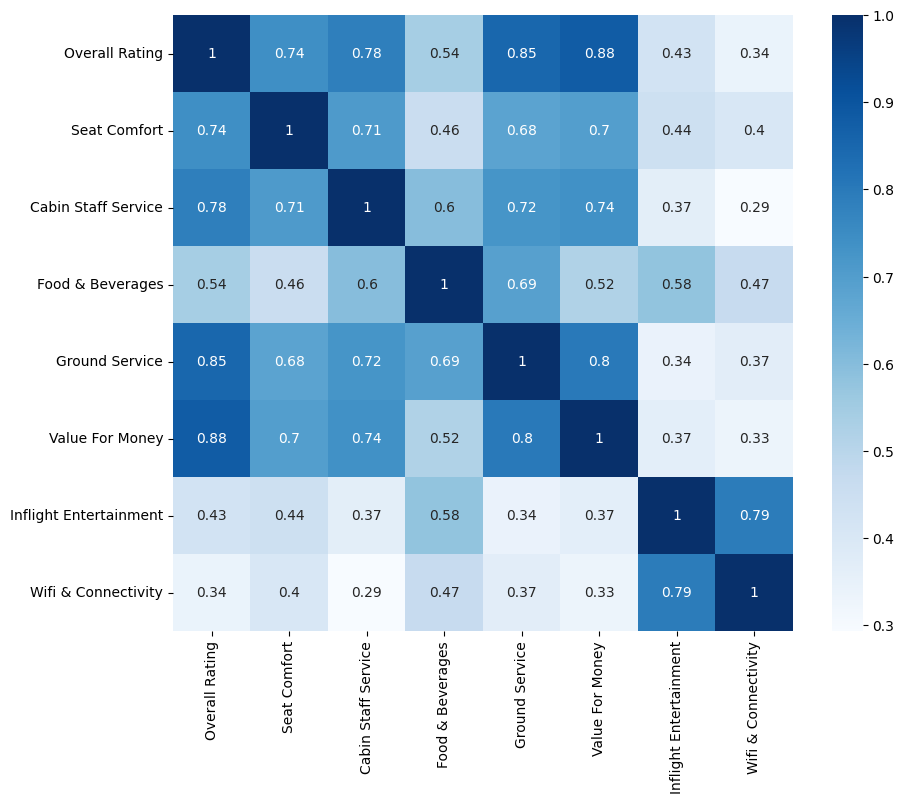

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(corr, cmap="Blues", annot=True)

### Κορυφαιοι προορισμοί

 #### Από Αθήνα

In [ ]:
athens_destinations = df[df['Origin'] == 'Athens']

destination_counts_from_athens = athens_destinations['Destination'].value_counts()

#Επιλέξτε τους πρώτους 5 μόνο προορισμούς συμπληρώνοντας κάτι στο τέλος της παρακάτω εντολής και αφαιρώντας το #

#top_5_destinations_from_athens = destination_counts_from_athens

print("Top 5 Προορισμοί από Athens:")
print(top_5_destinations_from_athens)


#### Δική σου αφετηρία
Παραπάνω, βλέπουμε τους τοπ 5 προορισμούς απο την Αθήνα.<br/>
Πάμε να δούμε για άλλη πόλη. <br/>
*Συμπληρώσε στο **your_origin** -μόνο στην πρώτη γραμμή- μία δική σου πόλη. (Δοκίμασε Budapest, Dublin ή Luton)*

In [ ]:
your_origin = "Budapest"
destinations = df[df['Origin'] == your_origin]

destination_counts_from_your_origin = destinations['Destination'].value_counts()

#Συμπληρώστε με τον ίδιο τρόπο

#top_5_destinations_from_your_origin = destination_counts_from_your_origin

print(f"Top 5 Προορισμοί από {your_origin}:")
print(top_5_destinations_from_your_origin)


### Οπτικοποίηση

Σημαντικό κομμάτι κάθε εργασίας ανάλυσης. Μερικά παραδείγματα:

In [ ]:
df_enc['Overall Rating'].plot(kind='hist',bins=20, title='Συνολική Βαθμολογία')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5_destinations_from_athens, labels=top_5_destinations_from_athens.index, autopct='%1.0f%%')
plt.title('Οι 5 Κορυφαίοι προορισμοί με αφετηρία την Αθήνα')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-88-e13c9b9efaa6>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seat Type', y='Overall Rating', data=df, palette='viridis')


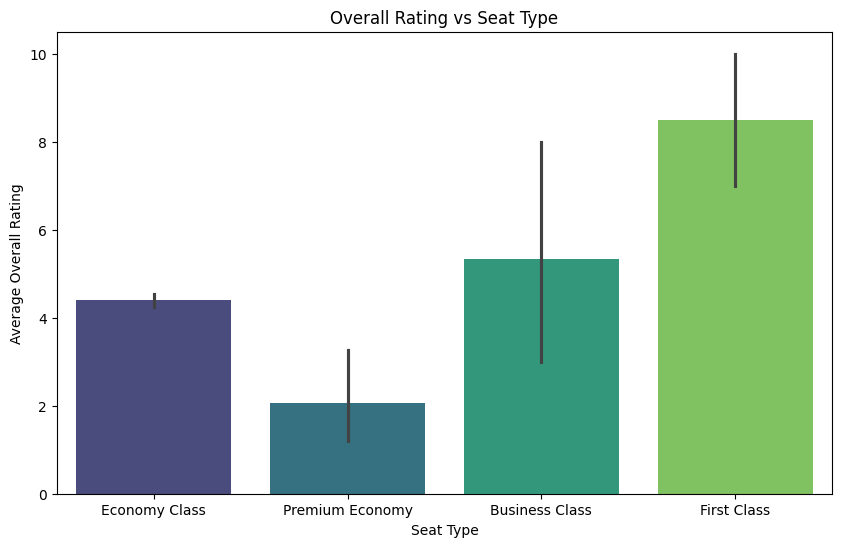

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Seat Type', y='Overall Rating', data=df, palette='viridis')
plt.title('Overall Rating vs Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Average Overall Rating')
plt.show()

### Κορυφαίες λεξεις στα σχόλια

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk
from tabulate import tabulate
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Concatenate all comments into a single string
all_comments = ' '.join(df['Comment'].dropna())

# Tokenize the comments
tokens = word_tokenize(all_comments)

# Remove stop words
stop_words = set(stopwords.words('english'))
additional_stop_words = ["would"]
stop_words.update(additional_stop_words)  # Append additional stop words
filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]

# Calculate word frequency
word_freq = Counter(filtered_tokens)

# Get the top 10 most frequent words
top_keywords = word_freq.most_common(10)

# Print the top keywords in a table
print(tabulate(top_keywords, headers=['Keyword', 'Frequency'], tablefmt='grid'))


+-----------+-------------+
| Keyword   |   Frequency |
+===========+=============+
| flight    |        3127 |
+-----------+-------------+
| ryanair   |        2952 |
+-----------+-------------+
| time      |        1333 |
+-----------+-------------+
| boarding  |        1120 |
+-----------+-------------+
| staff     |         939 |
+-----------+-------------+
| airport   |         927 |
+-----------+-------------+
| airline   |         894 |
+-----------+-------------+
| pay       |         870 |
+-----------+-------------+
| check     |         868 |
+-----------+-------------+
| us        |         859 |
+-----------+-------------+


Σε τι θα μπορόυσαν να μας χρησιμεύσουν τα παραπάνω στοιχεία;

## Κάνοντας προβλέψεις με τα δεδομένα

### Ταξινόμηση
έχουμε όταν θέλουμε να προβλέψουμε σε ποια κατηγορία ανήκει ένα δείγμα.

Μπορούμε να εφαρμόσουμε την ίδια μέθοδο για δύο κατηγορίες ("Προείνουν την αεροπορική: Ναι ή Όχι") ή και περισσότερες (Overall Rating). Παρακάτω χρησιμοποιούμε τον αλγόριθμο **Logistic Regression** για να παράξουμε προβλέψεις υπολογίζουμε το accuracy, δηλαδή τον αριθμό των σωστών ταξινομήσεων προς το συνολικό αριθμό προβλέψεων που έγιναν.

In [55]:
X = df_enc.drop(['Recommended'], axis=1)  # Features (excluding target)
y = df_enc['Recommended']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
logreg = LogisticRegression(class_weight={0: 1, 1: 2.009}, max_iter=1000)
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9575471698113207


In [56]:
X = df_enc.drop(['Overall Rating'], axis=1)  # Features (excluding target)
y = df_enc['Overall Rating']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5731132075471698


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Bonus ερώτημα

Χρησιμοποιώντας τον πίνακα correlation αφαιρέστε από τα χαρακτηριστικά εισόδου (X) πρώτα μια μεταβλητή που έχει μεγάλο correlation με την μεταβλητή πρόβλεψης y (στην περίπτωση "Reccomended") και έπειτα μια με μικρό. Παρατηρείστε πώς μεταβάλλεται το accuracy. Γιατί συμβαίνει αυτό;

# Ευχαριστούμε για την προσοχή σας ⚠

**Ερωτήσεις!**